In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u242-b08-0ubuntu3~18.04).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [0]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [0]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array

In [0]:
DATA_IN = 'data.txt'

INIT_1 = 'c1.txt'
INIT_2 = 'c2.txt'

data = pd.read_csv(DATA_IN,' ',header=None).values
c1 = pd.read_csv(INIT_1,' ',header=None).values
c2 = pd.read_csv(INIT_2,' ',header=None).values

In [0]:
def L2(a:np.array,b:np.array):
    d = a -b
    return d.dot(d)


def mahaten(a:np.array,b:np.array):
    d = a -b
    return np.sum(np.abs(d))

In [0]:
MAX_ITER = 20
N_CLUSTER = 10
dis_fun = L2

In [0]:
def kmeans(data:np.array,MAX_ITER:int, init_point:np.array,dis_fun):
    
    cost = np.zeros(MAX_ITER)
    for i in range(MAX_ITER):
        cluster = np.zeros_like(init_point)
        cnt = np.zeros(init_point.shape[0])

        for j in range(data.shape[0]):
            dist = np.array([dis_fun(data[j],e) for e in init_point])
            center = np.argmin(dist)
            cost[i] += dist[center]
            cluster[center]+= data[j]
            cnt[center] += 1
        
        init_point = cluster / cnt.reshape(cnt.shape[0],-1)

    return cost,init_point

In [0]:
cost1,center1 = kmeans(data,MAX_ITER,c1,L2)
cost2,center2 = kmeans(data,MAX_ITER,c2,L2)

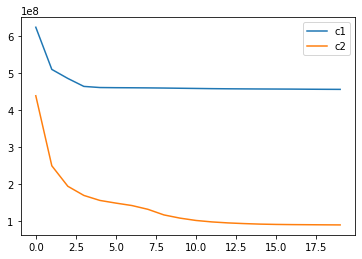

In [10]:
plt.plot(cost1,label='c1')
plt.plot(cost2,label='c2')
plt.legend()
plt.show()

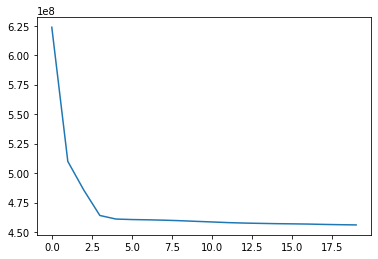

In [11]:
plt.plot(cost1)

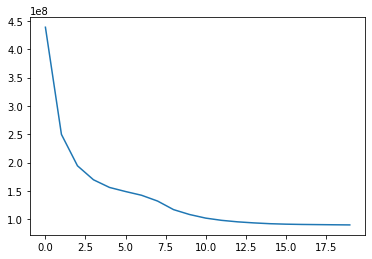

In [12]:
plt.plot(cost2)

In [0]:
cost1b,center1b = kmeans(data,MAX_ITER,c1,mahaten)
cost2b,center2b = kmeans(data,MAX_ITER,c2,mahaten)

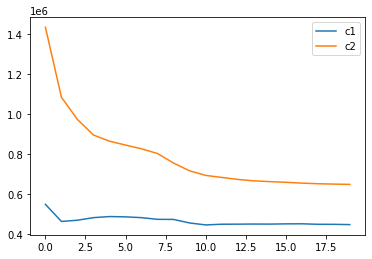

In [14]:
plt.plot(cost1b,label='c1')
plt.plot(cost2b,label='c2')
plt.legend()
plt.show()

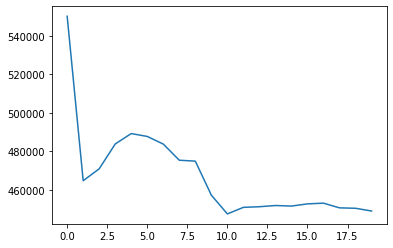

In [15]:
plt.plot(cost1b)

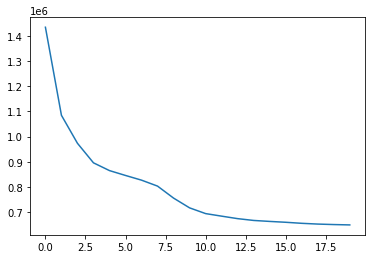

In [16]:
plt.plot(cost2b)